Chaves do dataset:  dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
Tamanho dos dados (linhas,colunas):  (150, 4)
Formato dos dados:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Espécies de Iris:  ['setosa' 'versicolor' 'virginica']
Espécie prevista: versicolor
Probabilidades:
  Espécies: ['setosa' 'versicolor' 'virginica']
  Probab. : [[0.  0.8 0.2]]
Accuracy is  97.77777777777777 % for K =20
Accuracy is  97.77777777777777 % for K-Value: 1
Accuracy is  97.77777777777777 % for K-Value: 2
Accuracy is  97.77777777777777 % for K-Value: 3
Accuracy is  95.55555555555556 % for K-Value: 4
Accuracy is  97.77777777777777 % for K-Value: 5
Accuracy is  97.77777777777777 % for K-Value: 6
Accuracy is  100.0 % for K-Value: 7
Accuracy is  97.77777777777777 % for K-Value: 8
Accuracy is  100.0 % for K-Value: 9
Accuracy is  100.0 % for K-Value: 10
Accuracy is  100.0 % for K-Value: 11
Accuracy is  100.0 % for K-Value: 12
Accuracy is  100.0 % 

Text(0.5,1,'KNN')

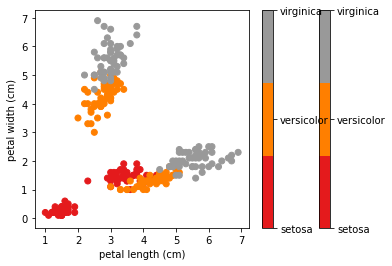

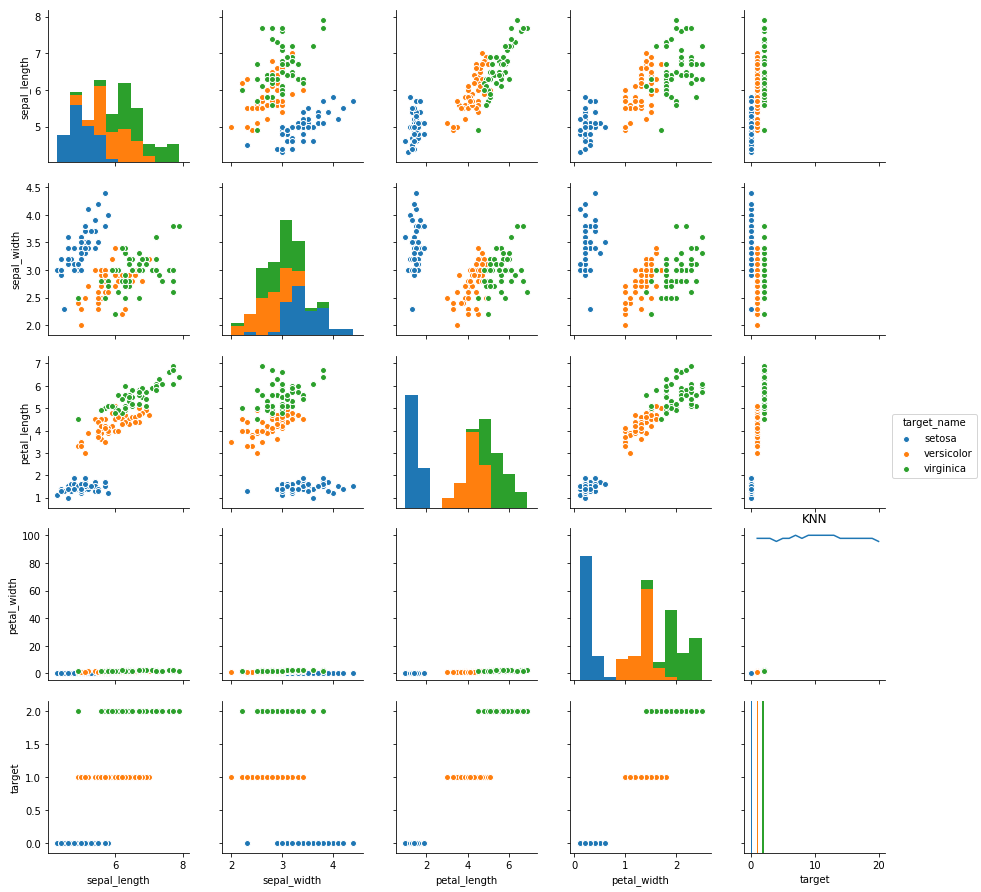

In [31]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.datasets import load_iris
data = load_iris()
from IPython.display import Image
Image(filename='iris.jpg') 
data
print ('Chaves do dataset: ', data.keys())
print ('Tamanho dos dados (linhas,colunas): ', data.data.shape)
print ('Formato dos dados: ', data.feature_names)
print ('Espécies de Iris: ', data.target_names)
plt.scatter(data.data[:, 1], data.data[:, 2],
            c=data.target, cmap=plt.cm.get_cmap('Set1', 3))
plt.xlabel(data.feature_names[1])
plt.ylabel(data.feature_names[2])

color_bar_formating = plt.FuncFormatter(lambda i, *args: data.target_names[int(i)])
plt.colorbar(ticks = [0,1,2], format = color_bar_formating)
plt.scatter(data.data[:, 2], data.data[:, 3],
            c=data.target, cmap=plt.cm.get_cmap('Set1', 3))
plt.xlabel(data.feature_names[2])
plt.ylabel(data.feature_names[3])

color_bar_formating = plt.FuncFormatter(lambda i, *args: data.target_names[int(i)])
plt.colorbar(ticks = [0,1,2], format = color_bar_formating)
df = pd.DataFrame(data.data[:], columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']) 
df['target'] = data.target
df['target'].unique()
df['target_name'] = df.apply(lambda row: data.target_names[int(row.target)], axis=1)
df.head()
sb.pairplot(df, hue='target_name') 

from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X, y = data.data, data.target
X.shape
y.shape
knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn.fit(X,y)
ex1 = [2, 2, 4, 2]
output = knn.predict([ex1,]) 
print ('Espécie prevista:', data.target_names[output][0])
print ('Probabilidades:') 
print ('  Espécies:', data.target_names)
print ('  Probab. :', knn.predict_proba([ex1, ]))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)
y_train = y_train.ravel()
y_test = y_test.ravel()
X_train.shape
X_test.shape
neigh = neighbors.KNeighborsClassifier(n_neighbors = 5, weights='uniform', algorithm='auto')
neigh.fit(X_train, y_train) 
y_pred = neigh.predict(X_test)
print ("Accuracy is ", accuracy_score(y_test,y_pred)*100,"% for K =20")










results_x = []
results_y = []
for K in range(20):
    K_value = K+1
    neigh = neighbors.KNeighborsClassifier(n_neighbors = K_value, weights='uniform', algorithm='auto')
    neigh.fit(X_train, y_train) 
    y_pred = neigh.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)*100
    print ("Accuracy is ", accuracy,"% for K-Value:",K_value)
    results_x.append(K_value)
    results_y.append(accuracy)
print('Melhor valor de k 13 com 100%')
plt.plot(results_x,results_y)
plt.title('KNN')